# **EDA by Muhammad  Zeeshan**

### **ENVIRONMENT SETTING**

In [5]:
# Importing the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importing the dataset
df = pd.read_csv('/content/_Amazon_Clothing_Sales_2025 DS12  - Amazon_Clothing_Sales_2025.csv')

In [7]:
df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile


## **A. Initial Data Exploration and Cleaning**

### 1. Schema and Types:

In [8]:
# Checking the dataset
df.columns

Index(['order_id', 'customer_id', 'product_id', 'product_name',
       'main_category', 'sub_category', 'brand', 'price', 'quantity',
       'discount_percent', 'final_price', 'payment_method', 'review_rating',
       'order_date', 'delivery_days', 'is_returned', 'region',
       'customer_age_group', 'device_type'],
      dtype='object')

In [9]:
# Inspecting the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            25000 non-null  object 
 1   customer_id         25000 non-null  object 
 2   product_id          25000 non-null  object 
 3   product_name        25000 non-null  object 
 4   main_category       25000 non-null  object 
 5   sub_category        25000 non-null  object 
 6   brand               23750 non-null  object 
 7   price               24750 non-null  float64
 8   quantity            25000 non-null  int64  
 9   discount_percent    25000 non-null  int64  
 10  final_price         25000 non-null  float64
 11  payment_method      23750 non-null  object 
 12  review_rating       25000 non-null  int64  
 13  order_date          25000 non-null  object 
 14  delivery_days       24750 non-null  float64
 15  is_returned         25000 non-null  int64  
 16  regi

In [10]:
for col in df.columns:
  print(df[col].head(5))

#  0   order_id             object   Ok
#  1   customer_id          object   Ok
#  2   product_id           object   Ok
#  3   product_name         object   OK
#  4   main_category        object   Ok
#  5   sub_category         object   Ok
#  6   brand                object   Ok
#  7   price                float64  Ok
#  8   quantity             int64    Categorical Behaviour
#  9   discount_percent     int64    Categorical Behvaiour
#  10  final_price          float64  Ok
#  11  payment_method       object   Ok
#  12  review_rating        int64    Categorical Behaviour
#  13  order_date           object   Convert to datetime
#  14  delivery_days        float64  Categorical Behaviour
#  15  is_returned          int64    Categorical Behaviour
#  16  region               object   Ok
#  17  customer_age_group   object   Categorical Behaviour
#  18  device_type          object   Ok

0    #HLWTRIGAJB0RFL
1    #9LMWG6T6H0IPE0
2    #Q6J5C5621SSE5V
3    #J145DOUKB5RVBN
4    #7ZXNMSUU22AK4J
Name: order_id, dtype: object
0    A86556872001
1    0A9218115AAA
2    8A5A09200074
3    97602786977A
4    744297746010
Name: customer_id, dtype: object
0    6Q3V14RXRF
1    33MRMEM3WN
2    E674NZH16V
3    ETMIXJHFAT
4    5BYOWYYY5P
Name: product_id, dtype: object
0     Huggies Rompers
1     Gerber Blankets
2        Fossil Jeans
3    Carter's Rompers
4     Adidas Sneakers
Name: product_name, dtype: object
0    baby
1    Baby
2     Men
3    Baby
4    Kids
Name: main_category, dtype: object
0     Rompers
1    Blankets
2       Jeans
3     Rompers
4    Sneakers
Name: sub_category, dtype: object
0     Huggies
1      Gerber
2      Fossil
3    Carter's
4      Adidas
Name: brand, dtype: object
0    118.62
1     26.84
2    219.38
3     12.05
4    145.36
Name: price, dtype: float64
0    1
1    1
2    2
3    1
4    1
Name: quantity, dtype: int64
0    10
1    15
2    25
3     0
4    10
Name: di

In [11]:
# Converting the Order_date column to DateTime Format
df['order_date'] = pd.to_datetime(df['order_date'])

In [12]:
# Statistical Summary of the numeric dataset
df.describe()

,price,quantity,discount_percent,final_price,review_rating,order_date,delivery_days,is_returned
count,24750.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,24750.000000,25000.000000
mean,155.395911,1.999400,12.527400,271.491812,3.698040,2024-12-29 16:37:48.288000,4.994869,0.098440
min,10.020000,1.000000,0.000000,7.530000,1.000000,2024-07-01 00:00:00,1.000000,0.000000
25%,82.010000,1.000000,5.000000,116.247500,3.000000,2024-09-29 00:00:00,3.000000,0.000000
50%,154.805000,2.000000,15.000000,219.410000,4.000000,2024-12-30 00:00:00,5.000000,0.000000
75%,229.007500,3.000000,20.000000,398.565000,4.000000,2025-03-31 00:00:00,7.000000,0.000000
max,299.980000,3.000000,25.000000,899.790000,5.000000,2025-06-30 00:00:00,9.000000,1.000000
std,84.443830,0.814755,8.543663,196.188476,1.095641,NaN,2.578238,0.297915


In [13]:
# Distribution of Categorical Columns
df.describe(include='O')

# All the CANDIDATE KEYS COLUMNS (order_id, customer_id, product_id) have 25000 total and 25000 unique values which means that there is no duplicate in the data.

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,payment_method,region,customer_age_group,device_type
count,25000,25000,25000,25000,25000,25000,23750,23750,23750,23750,23750
unique,25000,25000,25000,100,8,32,17,4,4,5,3
top,#ESF9EL1PBJ19OS,437139608515,TKVZYTQKPQ,Nike Sneakers,Kids,Shorts,Nike,Credit Card,Midwest,55+,App
freq,1,1,1,292,5726,1285,2448,5975,5979,4849,7974


### 2. Missing Values:

In [14]:
# Quantify missingness per column.

missing = df.isna().sum()

pct_missing = missing/len(df)

pct_missing

,0
order_id,0.00
customer_id,0.00
product_id,0.00
product_name,0.00
main_category,0.00
sub_category,0.00
brand,0.05
price,0.01
quantity,0.00
discount_percent,0.00


Columns with missing data:

brand ---------> Object -----> 5% -----------------> Mode

price ---------> Float ------> 1% -----------------> Mean/Median

payment_method --------> Object ------> 5% --------> Mode

delivery_days ---------> Float -----> 1%-----------> Median(Categorical Nature)

region --------> Object ------> 5%-----------------> Mode

customer_age_group  ---> Object ------> 5%---------> Mode

device_type ------> Object ---------> 5%-----------> Mode


In [15]:
# Flagging all the columns with missing data into new flagged columns so that when I impute them then I should have a footprint of the missing values

df['brand_missing_flag'] = df['brand'].isnull()
df['price_missing_flag'] = df['price'].isnull()
df['payment_method_missing_flag'] = df['payment_method'].isnull()
df['delivery_days_missing_flag'] = df['delivery_days'].isnull()
df['region_missing_flag'] = df['region'].isnull()
df['customer_age_group_missing_flag'] = df['customer_age_group'].isnull()
df['device_type_missing_flag'] = df['device_type'].isnull()

In [16]:
# Imputing the missing data with appropriate values

brand_mode = df['brand'].mode()[0]
df['brand'].fillna(brand_mode, inplace=True)

payment_mode = df['payment_method'].mode()[0]
df['payment_method'].fillna(payment_mode, inplace=True)

device_mode = df['device_type'].mode()[0]
df['device_type'].fillna(device_mode, inplace=True)

region_mode = df['region'].mode()[0]
df['region'].fillna(region_mode, inplace=True)

customer_age_mode = df['customer_age_group'].mode()[0]
df['customer_age_group'].fillna(customer_age_mode, inplace=True)

df['price'].fillna(df['price'].median(), inplace=True)
df['delivery_days'].fillna(df['delivery_days'].median(), inplace=True)

/tmp/ipython-input-3546450703.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna(brand_mode, inplace=True)
/tmp/ipython-input-3546450703.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [17]:
# Counter-checking the missing percentage of differet columns

missing = df.isna().sum()

pct_missing = missing/len(df)


pct_missing

,0
order_id,0.0
customer_id,0.0
product_id,0.0
product_name,0.0
main_category,0.0
sub_category,0.0
brand,0.0
price,0.0
quantity,0.0
discount_percent,0.0


In [18]:
# Inspecting the dataset now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   order_id                         25000 non-null  object        
 1   customer_id                      25000 non-null  object        
 2   product_id                       25000 non-null  object        
 3   product_name                     25000 non-null  object        
 4   main_category                    25000 non-null  object        
 5   sub_category                     25000 non-null  object        
 6   brand                            25000 non-null  object        
 7   price                            25000 non-null  float64       
 8   quantity                         25000 non-null  int64         
 9   discount_percent                 25000 non-null  int64         
 10  final_price                      25000 non-null  float64  

### 3. Duplicates and Integrity:

In [19]:
# Are there duplicates?

df.duplicated().sum()

np.int64(0)

In [20]:
# Counter-checking for duplicated values with the 'Order-id' column

df['order_id'].duplicated().sum()

np.int64(0)

In [21]:
# Consistency between price, discount_percent, and final_price (validate formula).

formula_df = df[['price','discount_percent','final_price']]
formula_df.head()

,price,discount_percent,final_price
0,118.62,10,106.76
1,26.84,15,22.81
2,219.38,25,329.07
3,12.05,0,12.05
4,145.36,10,130.82


In [22]:
counter_check = df['price'] - ((df['price'] * (df['discount_percent']/100)).round(2)) == df['final_price']

counter_check.value_counts()

# This is showing me that there are 5000+ rows where the final price does not follow the discount percentage given.
# I need to make sure that all the rows duly follow the discount guidelines.

,count
False,19160
True,5840


In [23]:
# Contructing a new feature  containing new and correct final price duly following the formula.
df['new_final_price'] = df['price'] - ((df['price'] * (df['discount_percent']/100)).round(2))

### 4. Outliers:

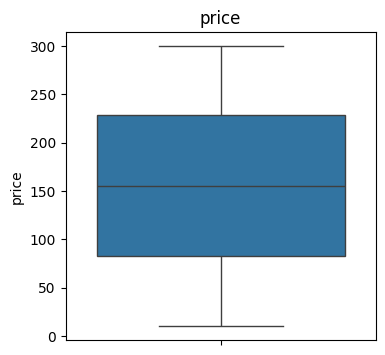

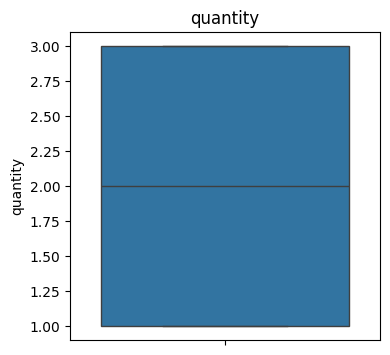

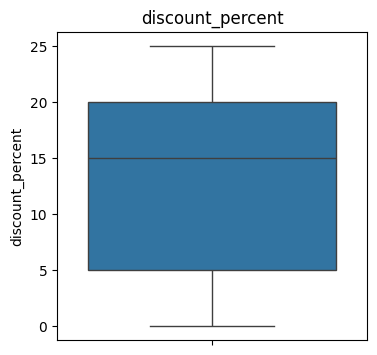

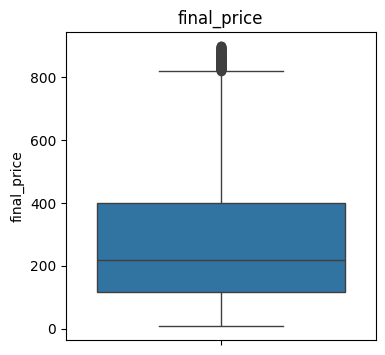

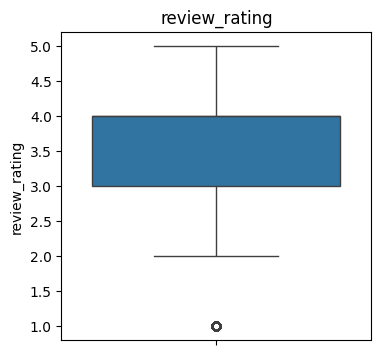

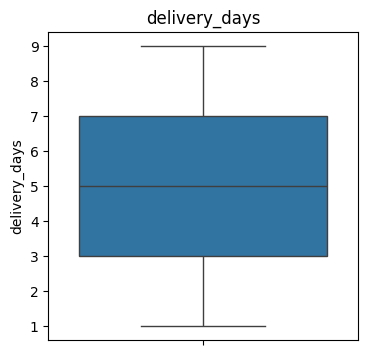

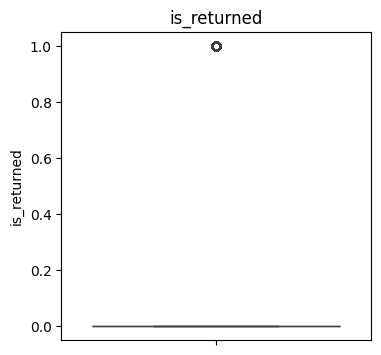

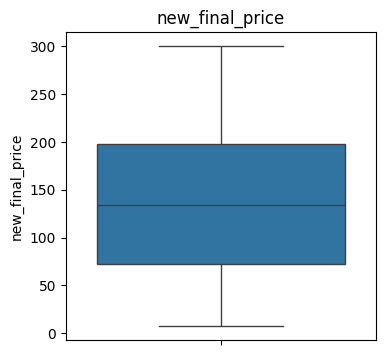

In [24]:
# Checking for numerical outliers

for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

# Only the column fina_price has some outliers but since we have already created a new_final_price column so it's of no concern for us
# Review_rating has only one outlier but it seems justified

In [25]:
# Checking for Categorical Outliers

for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(dropna=False).sort_values(ascending=True))

# There is visible problems with the (main_category and sub_category) columns that needs to be taken care of.

order_id
#HHPN16LQLWMB0F    1
#N3P11ZRLVBUC9Y    1
#GZNOZRK2QO1YGP    1
#L3VYV8XMIQLM74    1
#DJWH8TRQVAVTPJ    1
                  ..
#BK31F68PRM5VH8    1
#GYC3VPIE2CLT6C    1
#OKQTHH2LY9WEEB    1
#UTRQMENIVCWK7G    1
#ESF9EL1PBJ19OS    1
Name: count, Length: 25000, dtype: int64
customer_id
396512240651    1
492622908590    1
755A6106A223    1
985136894259    1
60668145719     1
               ..
435A49953102    1
AAA142A58679    1
203512125403    1
275180868989    1
437139608515    1
Name: count, Length: 25000, dtype: int64
product_id
FT0IG7QY7B    1
HKSCXAV8W7    1
F0P8ZVNFKT    1
PHD5DL01SK    1
WS1T62P45C    1
             ..
LV81PRDJ0L    1
2VRI9T0LCC    1
PKDFJH2MEK    1
Z7UD12K6M9    1
TKVZYTQKPQ    1
Name: count, Length: 25000, dtype: int64
product_name
Reebok Handbags         212
Coach Jewelry           223
H&M Dresses             226
Michael Kors Sandals    227
OshKosh Sneakers        228
                       ... 
Michael Kors Jewelry    276
Zara Tops               278
Car

In [26]:
# THERE ARE INCONSISTENT VALUES IN THE "MAIN CATEGORY" AND "SUB CATEGORY" COLUMN.
# TREATING INCONSISTENT VALUES IN BOTH COLUMNS

# Man - man
# Baby - baby
df['main_category']= df['main_category'].str.lower().str.title()

# Rompers - Romp3rs
# Blankets - Blank3ts
#Jeans - J3ans
# Sneakers - Sn3ak3rs
# Shoes - Sho3s
# Onesies - On3si3s etc etc etc in 'sub-category' column
df['sub_category'] = df['sub_category'].str.replace('3','e')

### 5. Feature Engineering:

In [27]:
# Extract order_month, order_weekday, order_year from order_date.

df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['day_of_week'] = df['order_date'].dt.dayofweek

In [28]:
df[['order_date', 'order_day', 'day_of_week', 'order_month', 'order_year']]

,order_date,order_day,day_of_week,order_month,order_year
0,2024-09-10,10,1,9,2024
1,2025-06-25,25,2,6,2025
2,2025-01-08,8,2,1,2025
3,2024-08-28,28,2,8,2024
4,2024-11-12,12,1,11,2024
...,...,...,...,...,...
24995,2024-11-15,15,4,11,2024
24996,2025-01-10,10,4,1,2025
24997,2025-01-09,9,3,1,2025
24998,2024-10-23,23,2,10,2024


In [29]:
# Compute discount_amount = price * discount_percent / 100.

df['discount_amount'] = (df['price'] * (df['discount_percent']/100)).round(2)
df['discount_amount']

,discount_amount
0,11.86
1,4.03
2,54.84
3,0.00
4,14.54
...,...
24995,25.65
24996,40.13
24997,26.17
24998,25.83


In [30]:
# Create unit_price = final_price / quantity.

df['unit_price'] = df['new_final_price']/df['quantity']
df['unit_price']

,unit_price
0,106.760
1,22.810
2,82.270
3,12.050
4,130.820
...,...
24995,102.610
24996,53.510
24997,52.350
24998,146.340


In [31]:
# Flag “fast” vs “slow” delivery (e.g., delivery_days threshold).

# Inspecting the distribution of delivery_days column for viable category construction
df['delivery_days'].value_counts().sort_index()

,count
delivery_days,
1.0,2764
2.0,2718
3.0,2744
4.0,2805
5.0,2997
6.0,2761
7.0,2757
8.0,2715
9.0,2739


In [32]:
# Constructing a new column containing the category based on delivery_days

conditions = [
    df['delivery_days'] == 1.0,
    df['delivery_days'].between(2.0, 4.0, inclusive='both'),
    df['delivery_days'] >= 5.0
]

choices = ['same_day_delivery', 'fast_delivery', 'slow_delivery']

df['delivery_category'] = np.select(conditions, choices, default='unknown')

In [33]:
# Checking the dataset after multiple new features creation
df.columns

Index(['order_id', 'customer_id', 'product_id', 'product_name',
       'main_category', 'sub_category', 'brand', 'price', 'quantity',
       'discount_percent', 'final_price', 'payment_method', 'review_rating',
       'order_date', 'delivery_days', 'is_returned', 'region',
       'customer_age_group', 'device_type', 'brand_missing_flag',
       'price_missing_flag', 'payment_method_missing_flag',
       'delivery_days_missing_flag', 'region_missing_flag',
       'customer_age_group_missing_flag', 'device_type_missing_flag',
       'new_final_price', 'order_year', 'order_month', 'order_day',
       'day_of_week', 'discount_amount', 'unit_price', 'delivery_category'],
      dtype='object')

In [34]:
# Customer-level aggregates: total spend, total orders, average rating given, return rate.

df.groupby('customer_id').agg({
    'new_final_price': 'sum',
    'order_id': 'count',
    'review_rating': 'mean',
    'is_returned': 'mean',
}).rename(columns={
    'new_final_price': 'total_spend',
    'order_id': 'total_orders',
    'review_rating': 'avg_rating',
    'is_returned': 'return_rate'
}).sort_values(by='total_spend', ascending=False)


,total_spend,total_orders,avg_rating,return_rate
customer_id,,,,
A56869856972,299.93,1,3.0,0.0
06863641A452,299.83,1,4.0,0.0
838978733223,299.80,1,3.0,0.0
24A4A7913710,299.76,1,5.0,1.0
828511750A15,299.74,1,4.0,0.0
...,...,...,...,...
6782867879A5,7.77,1,1.0,1.0
592A88180245,7.70,1,3.0,0.0
54A406406977,7.64,1,4.0,0.0


## **B. Univariate Analysis**

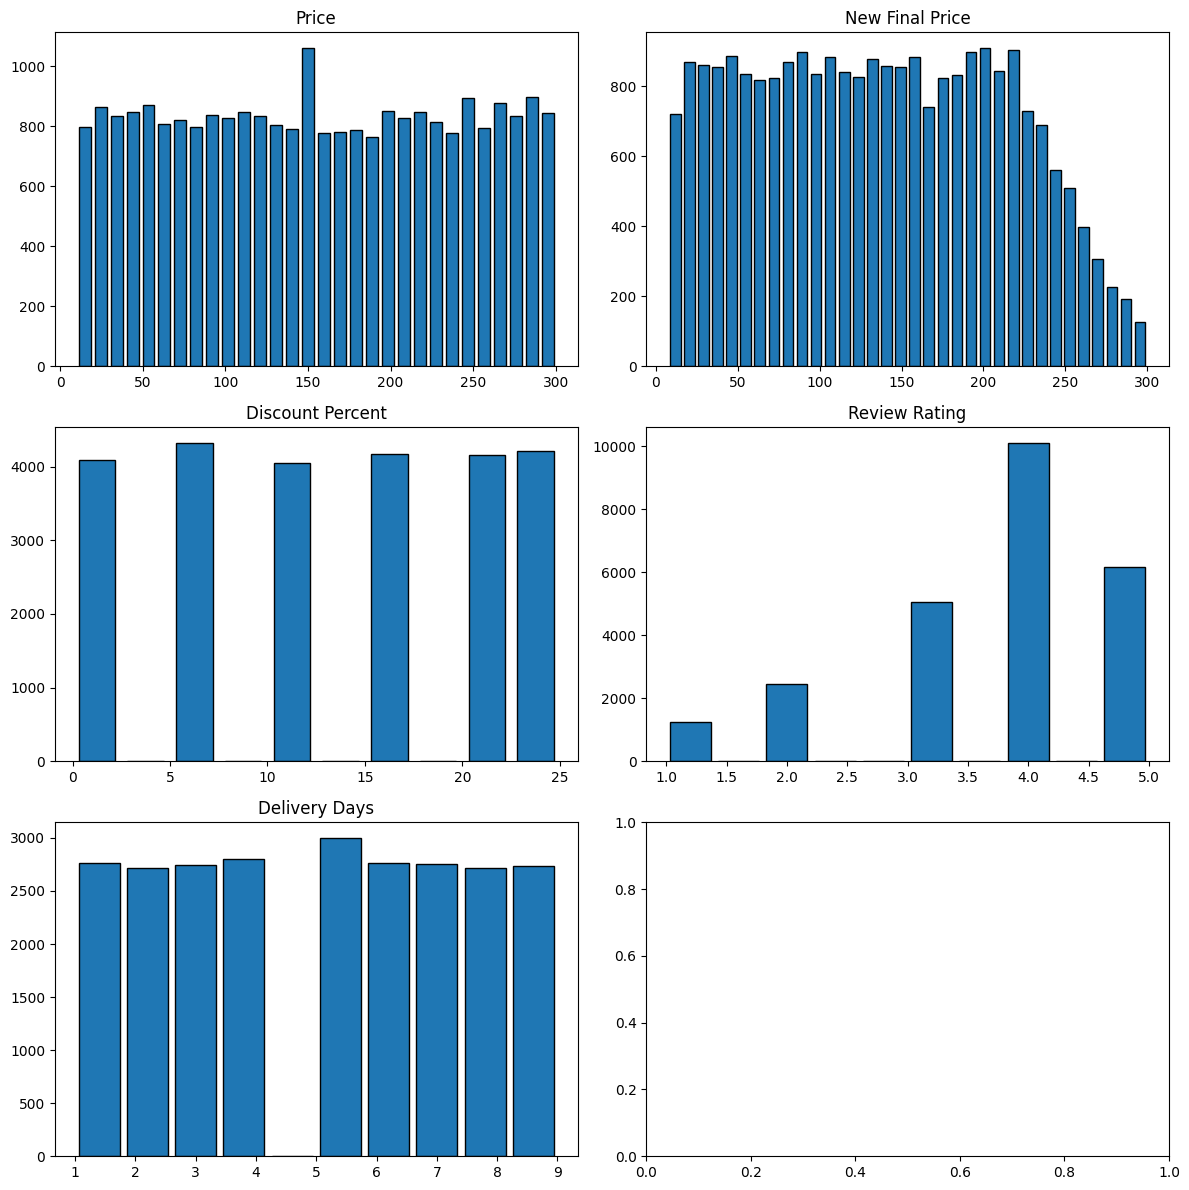

In [35]:
# Distribution of price, final_price, discount_percent, review_rating, delivery_days.

fig, ax =  plt.subplots(nrows=3, ncols=2, figsize=(12,12))

ax[0,0].hist(df['price'], bins=30, rwidth=0.75, edgecolor='black')
ax[0,1].hist(df['new_final_price'],bins='auto', rwidth=0.75, edgecolor='black')
ax[1,0].hist(df['discount_percent'], rwidth=0.75, edgecolor='black')
ax[1,1].hist(df['review_rating'], rwidth=0.85, edgecolor='black')
ax[2,0].hist(df['delivery_days'], rwidth=0.85, edgecolor='black')

ax[0,0].set_title('Price')
ax[0,1].set_title('New Final Price')
ax[1,0].set_title('Discount Percent')
ax[1,1].set_title('Review Rating')
ax[2,0].set_title('Delivery Days')


plt.tight_layout()
plt.show()

# More items with the price tag of 150$ were sold than any other price
# After discount, however, the final price tend to get random and well the range of 1000$
# More and more products were sold at a discount of 5%
# Most products were delivered in the 5 days span
# 4 was the most given review

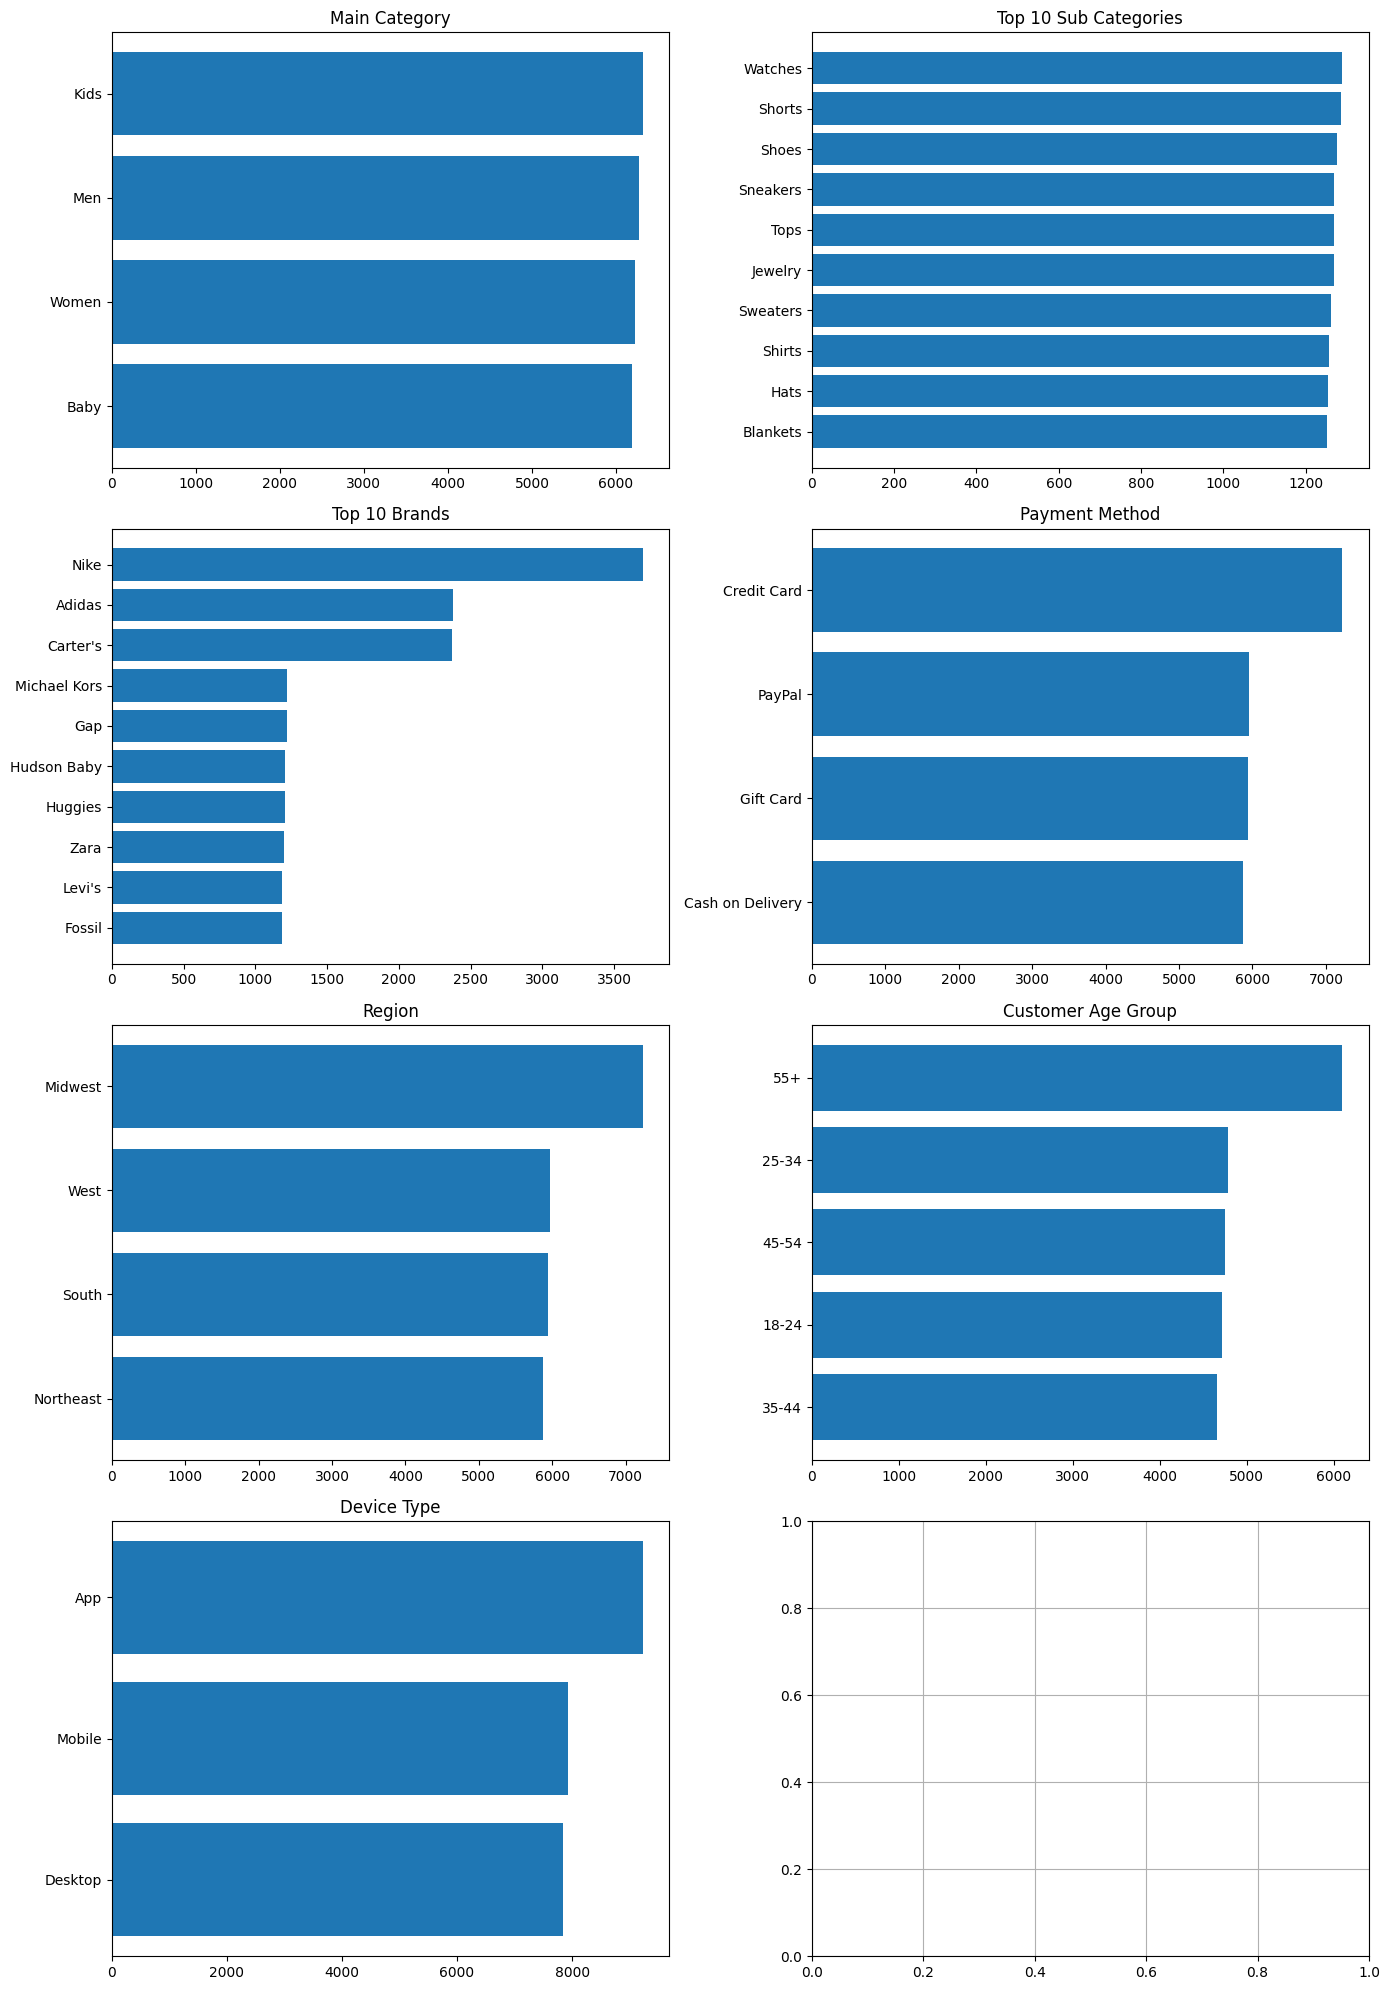

In [36]:
# Counts / frequency of main_category, sub_category, brand, payment_method,  region, customer_age_group, device_type.

fig , ax=plt.subplots(nrows = 4, ncols = 2, figsize = (14,20))

ax[0,0].barh(df['main_category'].value_counts().index, df['main_category'].value_counts().values)
ax[0,1].barh(df['sub_category'].value_counts().head(10).index, df['sub_category'].value_counts().head(10).values)
ax[1,0].barh(df['brand'].value_counts().head(10).index, df['brand'].value_counts().head(10).values)
ax[1,1].barh(df['payment_method'].value_counts().index, df['payment_method'].value_counts().values)
ax[2,0].barh(df['region'].value_counts().index, df['region'].value_counts().values)
ax[2,1].barh(df['customer_age_group'].value_counts().index, df['customer_age_group'].value_counts().values)
ax[3,0].barh(df['device_type'].value_counts().index, df['device_type'].value_counts().values)

ax[0,0].set_title('Main Category')
ax[0,1].set_title('Top 10 Sub Categories')
ax[1,0].set_title('Top 10 Brands')
ax[1,1].set_title('Payment Method')
ax[2,0].set_title('Region')
ax[2,1].set_title('Customer Age Group')
ax[3,0].set_title('Device Type')

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()
ax[1,1].invert_yaxis()
ax[2,0].invert_yaxis()
ax[2,1].invert_yaxis()
ax[3,0].invert_yaxis()

plt.tight_layout()
plt.grid()
plt.show()


# Nike sold the most products
# People above the age of 55 made the most orders
# Midwest outperformed all the other regions
# On-app payments is the most frequently used method of payment

In [37]:
# Returned vs non-returned proportion.

df['is_returned'].value_counts()/len(df) * 100

,count
is_returned,
0,90.156
1,9.844


## **C. Bivariate &amp; Multivariate Analysis**

### 1. Sales Performance:

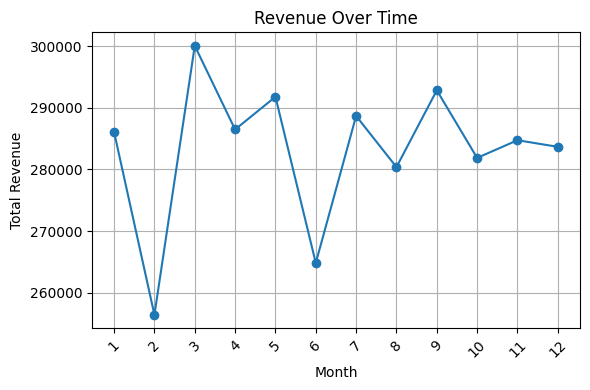

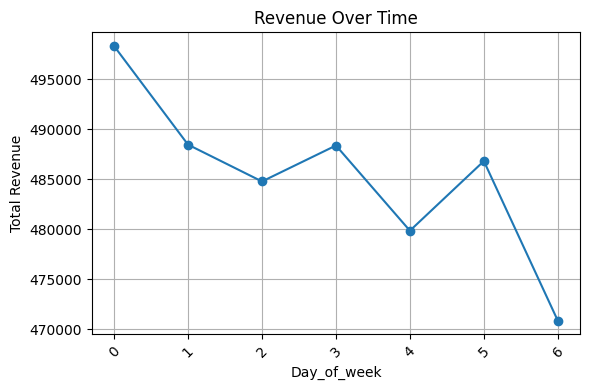

In [38]:
# Revenue over time (weekly/ monthly trend)


df_new = df[['new_final_price', 'order_month','day_of_week']].copy()

monthly_revenue = df_new.groupby('order_month')['new_final_price'].sum().reset_index()
weekly_revenue = df_new.groupby('day_of_week')['new_final_price'].sum().reset_index()


monthly_revenue.sort_values('order_month', inplace=True)
weekly_revenue.sort_values('day_of_week', inplace=True)

plt.figure(figsize=(6,4))
plt.plot(monthly_revenue['order_month'], monthly_revenue['new_final_price'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(ticks=monthly_revenue['order_month'], rotation=45)
plt.tight_layout()
plt.show()



plt.figure(figsize=(6,4))
plt.plot(weekly_revenue['day_of_week'], weekly_revenue['new_final_price'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Day_of_week')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(ticks=weekly_revenue['day_of_week'], rotation=45)
plt.tight_layout()
plt.show()

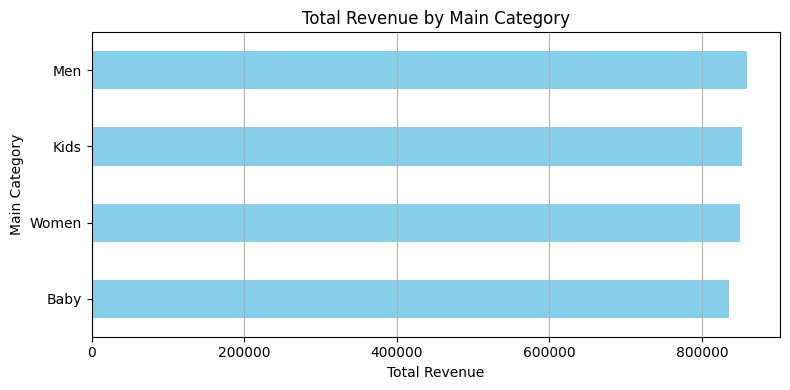

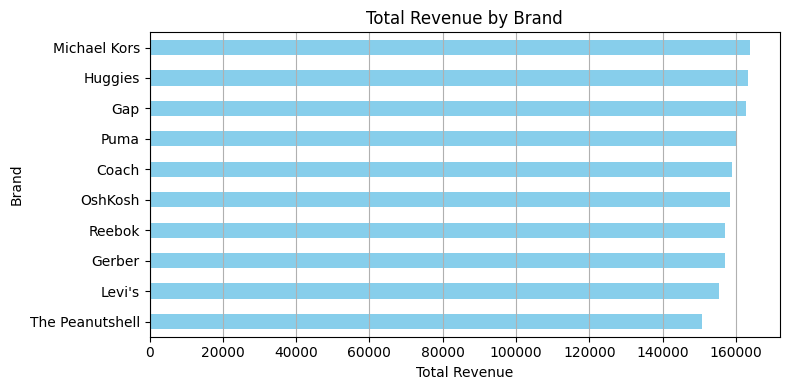

In [39]:
# Which categories/brands drive most revenue?

df.groupby('main_category')['new_final_price'].sum().sort_values().plot(
    kind='barh', figsize=(8,4), color='skyblue'
)

plt.title('Total Revenue by Main Category')
plt.xlabel('Total Revenue')
plt.ylabel('Main Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


df.groupby('brand')['new_final_price'].sum().sort_values().head(10).plot(
    kind='barh', figsize=(8,4), color='skyblue'
)

plt.title('Total Revenue by Brand')
plt.xlabel('Total Revenue')
plt.ylabel('Brand')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Almost all the categories and brands drove equal amount of revenues for the store
# The competition was ina tight range so there is no one winner

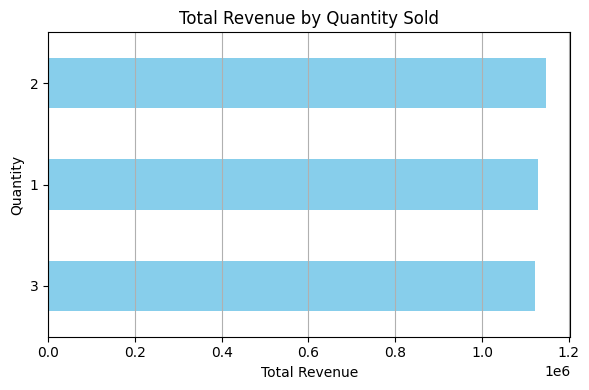

In [40]:
# Price vs quantity sold (does higher price suppress quantity?).
# No, higher prices does not necessarily suppress quantity as there are more orders with 2 quantity than 1 that exceeds higher price threshold

df.groupby('quantity')['new_final_price'].sum().sort_values().plot(
    kind='barh', figsize=(6,4), color='skyblue'
)

plt.title('Total Revenue by Quantity Sold')
plt.xlabel('Total Revenue')
plt.ylabel('Quantity')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Interestingly, people tend to purchase two items at a time. This is really something out of the blue. WHo would have thought that people tend to shop in such strange manner

### 2. Discount Effectiveness:

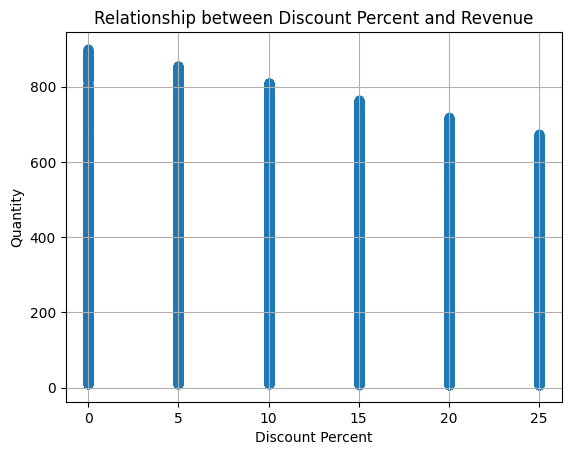

In [41]:
# Relationship between discount percent and quantity sold / revenue.
# Surprisingly, the higher the discount , the lesser the revenue
# I believe the store provided high discount on expensive items only. But since not many people could afford expensive items so lower revenue was generated.
# This significantly drives down the revenue for higher discount bracket

df['revenue'] = df['new_final_price'] * df['quantity']

plt.scatter(df['discount_percent'], df['revenue'])
plt.title('Relationship between Discount Percent and Revenue')
plt.xlabel('Discount Percent')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

### 3. Returns Analysis:

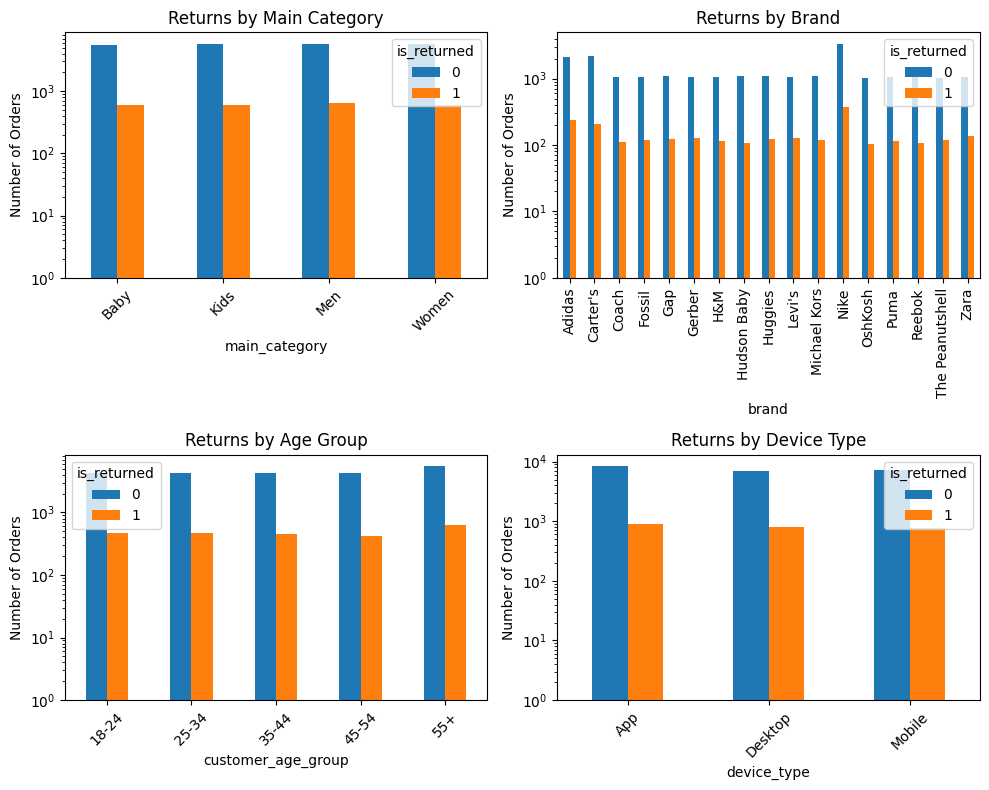

In [42]:
# Return rate by category, brand, customer age group, device type.

category = df.groupby(['main_category', 'is_returned']).size().unstack(fill_value=0)
brand = df.groupby(['brand', 'is_returned']).size().unstack(fill_value=0)
age_group = df.groupby(['customer_age_group', 'is_returned']).size().unstack(fill_value=0)
device = df.groupby(['device_type', 'is_returned']).size().unstack(fill_value=0)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

category.plot(kind='bar', ax=ax[0,0], log=True)
brand.plot(kind='bar', ax=ax[0,1], log=True)
age_group.plot(kind='bar', ax=ax[1,0], log=True)
device.plot(kind='bar', ax=ax[1,1], log=True)


ax[0,0].set_title('Returns by Main Category')
ax[0,0].set_ylabel('Number of Orders')
ax[0,0].tick_params(axis='x', rotation=45)
ax[0,1].set_title('Returns by Brand')
ax[0,1].set_ylabel('Number of Orders')
ax[0,1].tick_params(axis='x')
ax[1,0].set_title('Returns by Age Group')
ax[1,0].set_ylabel('Number of Orders')
ax[1,0].tick_params(axis='x', rotation=45)
ax[1,1].set_title('Returns by Device Type')
ax[1,1].set_ylabel('Number of Orders')
ax[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Well, the return rate is almost similar across the main category,age group and device type
# Interestngly, while Nike sold the most products, they also received the most returns. But that doesn't really puts a dent in Nike revenue as they sold way more than that
# For other brands like Adidas and Carter I feel sorry as they also have to receive returns while they didn't sold as much as Nike

### 4. Customer Behavior:

In [43]:
# High-value customers vs one-time buyers (segmentation).

df['customer_id'].describe()

# There are no repeat customers. All of them are one-time buyers

,customer_id
count,25000
unique,25000
top,437139608515
freq,1


In [44]:
# Average order value (AOV) by region / age group.

avg_region = df.groupby('region')['new_final_price'].mean().sort_values(ascending=False)
avg_age_group = df.groupby('customer_age_group')['new_final_price'].mean().sort_values(ascending=False)

print('Average Order value by Region')
display(avg_region)

print('==========================================')

print('Average Order value by Age Group')
display(avg_age_group)

# Northeast has the highest order values in the regions
# Young blood (18 - 24) tend to shop the most

Average Order value by Region


,new_final_price
region,
Northeast,137.875162
South,136.404394
Midwest,135.120120
West,134.419906


Average Order value by Age Group


,new_final_price
customer_age_group,
18-24,137.587868
25-34,136.615051
45-54,135.579270
35-44,135.550816
55+,134.572667


In [45]:
# Average Order Value with Region and Customer age group combined

df.groupby(['region','customer_age_group']).agg({
    'price' :'mean'}).round(2).sort_values(by='price', ascending=False)

#  Perfecntly validates out observation

price
region    customer_age_group        
Northeast 18-24               159.07
          55+                 158.32
West      25-34               158.07
South     18-24               157.86
          45-54               157.44
Northeast 45-54               157.26
Midwest   18-24               157.03
          35-44               157.00
Northeast 35-44               156.66
          25-34               156.35
West      18-24               155.71
Midwest   25-34               155.59
South     25-34               154.82
          35-44               154.62
          55+                 153.72
West      45-54               152.84
Midwest   45-54               152.60
          55+                 152.41
West      55+                 151.75
          35-44               150.70

### 5. Delivery Performance:

In [46]:
# Delivery days distribution and its effect on review rating / return probability.

# People tend to give 5.0 stars  for the delivery made in 3 - 5 days timespan.
df.groupby(['delivery_days','review_rating'])['review_rating'].count().sort_values(ascending=False)

,,review_rating
delivery_days,review_rating,
7.0,4,1172
5.0,4,1167
4.0,4,1144
6.0,4,1133
1.0,4,1120
9.0,4,1098
2.0,4,1095
8.0,4,1090
3.0,4,1071


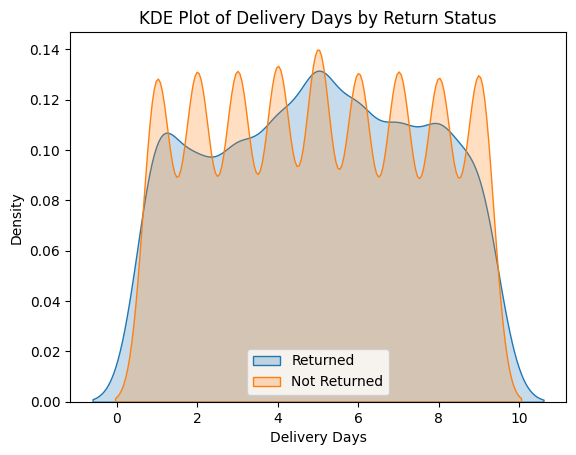

In [47]:
# Orders delivered on 5th day after placement tend to get returned more on average.
# Surprisingly, orders delivered on the same day also tend to get returned.

sns.kdeplot(data=df[df['is_returned'] == 1]['delivery_days'], label='Returned', fill=True)
sns.kdeplot(data=df[df['is_returned'] == 0]['delivery_days'], label='Not Returned', fill=True)
plt.title('KDE Plot of Delivery Days by Return Status')
plt.xlabel('Delivery Days')
plt.legend()
plt.show()

### 6. Rating Signal:

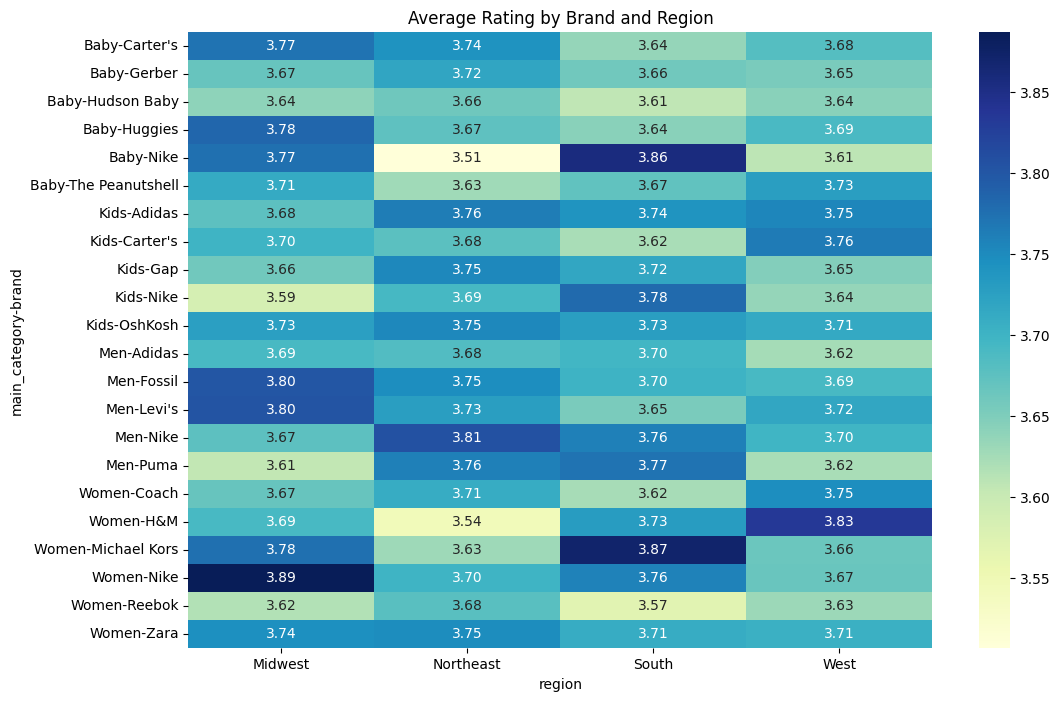

In [48]:
# Average rating by brand, category, region.

pivot = df.pivot_table(index=['main_category','brand'], columns='region', values='review_rating', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Rating by Brand and Region')
plt.show()

In [49]:
# Average rating by brand, category, region.

df.groupby(['main_category','brand','region']).agg({
    'review_rating':'mean'
})

review_rating
main_category brand    region                  
Baby          Carter's Midwest         3.771605
                       Northeast       3.742063
                       South           3.636054
                       West            3.681159
              Gerber   Midwest         3.668657
...                                         ...
Women         Reebok   West            3.630435
              Zara     Midwest         3.744737
                       Northeast       3.749104
                       South           3.710145
                       West            3.705660

[88 rows x 1 columns]

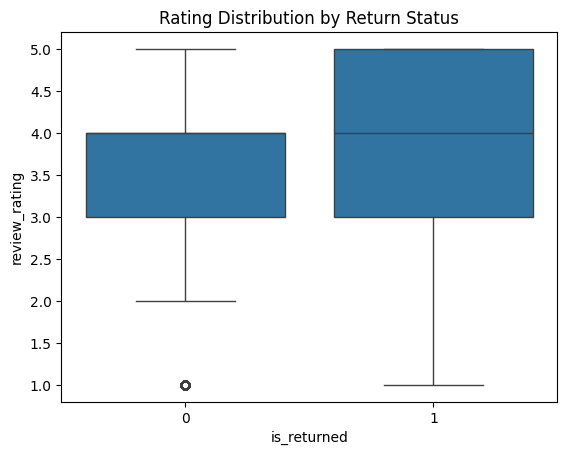

In [50]:
# Correlate low ratings with subsequent returns.

sns.boxplot(x='is_returned', y='review_rating', data=df)
plt.title("Rating Distribution by Return Status")
plt.show()

# Returned items tend to have more ratings than not-returned. VERY STRANGE !!!
# Returned items have a similar or slightly higher median rating.
# Low ratings occur in both groups.
# Rating and return are not strongly correlated.

### 7. Payment Method Insights:

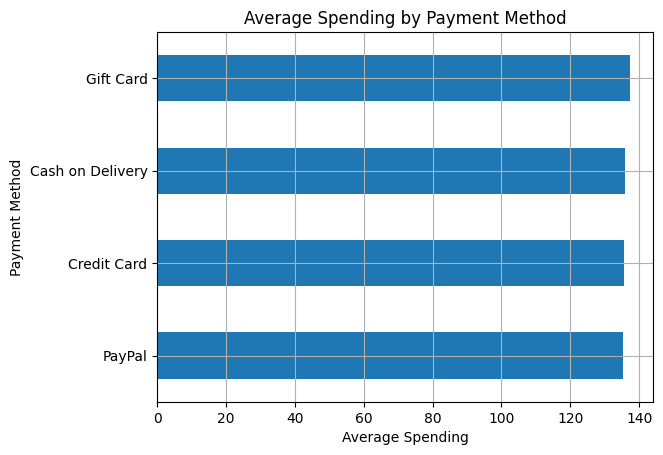

In [51]:
# Does payment method influence average spend?

df.groupby('payment_method')['new_final_price'].mean().sort_values().plot(kind='barh')

plt.title('Average Spending by Payment Method')
plt.xlabel('Average Spending')
plt.ylabel('Payment Method')
plt.grid()
plt.show()

# Well there is no large difference for different payment methods

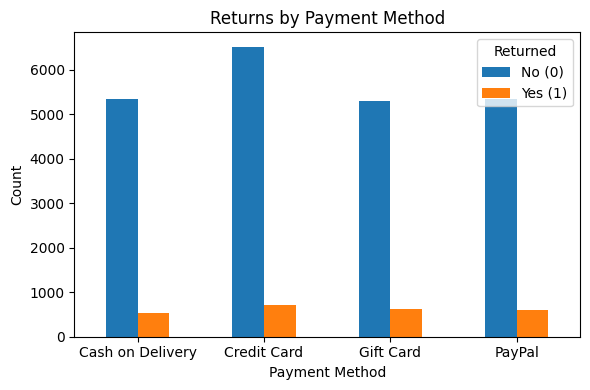

In [52]:
# Does payment method influence return likelihood.

grouped = df.groupby(['payment_method', 'is_returned']).size().unstack(fill_value=0)

grouped.plot(kind='bar', figsize=(6,4))
plt.title('Returns by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Returned', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

# Again no discernible insight here

### 8. Cross-analysis:

In [53]:
# Return rate for mobile users vs desktop, region vs delivery performance, age group vs discount sensitivity.

df.groupby(['customer_age_group', 'discount_percent'])['is_returned'].median().unstack()

discount_percent,0,5,10,15,20,25
customer_age_group,,,,,,
18-24,0.0,0.0,0.0,0.0,0.0,0.0
25-34,0.0,0.0,0.0,0.0,0.0,0.0
35-44,0.0,0.0,0.0,0.0,0.0,0.0
45-54,0.0,0.0,0.0,0.0,0.0,0.0
55+,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df.groupby(['region', 'delivery_category'])['is_returned'].median().unstack()

delivery_category,fast_delivery,same_day_delivery,slow_delivery
region,,,
Midwest,0.0,0.0,0.0
Northeast,0.0,0.0,0.0
South,0.0,0.0,0.0
West,0.0,0.0,0.0


## D. Hypothesis Ideas (picks/answers at least 5)

In [55]:
# HYPOTHESIS 1: Certain age groups (e.g., 25–34) have higher average order values.

avg_region = df.groupby('region')['new_final_price'].mean().sort_values(ascending=False)
avg_age_group = df.groupby('customer_age_group')['new_final_price'].mean().sort_values(ascending=False)

print('Average Order value by Region')
display(avg_region)

print('==========================================')

print('Average Order value by Age Group')
display(avg_age_group)

# Northeast has the highest order values in the regions
# Young blood (18 - 24) tend to shop the most
# So yes young blood from Northeast tend to have higher average order values

Average Order value by Region


,new_final_price
region,
Northeast,137.875162
South,136.404394
Midwest,135.120120
West,134.419906


Average Order value by Age Group


,new_final_price
customer_age_group,
18-24,137.587868
25-34,136.615051
45-54,135.579270
35-44,135.550816
55+,134.572667


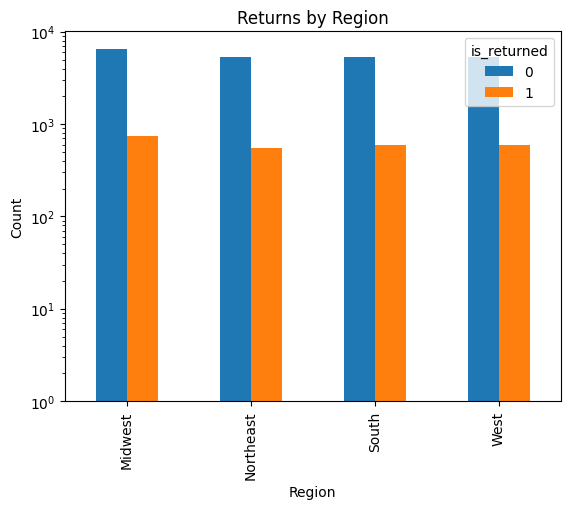

In [56]:
# HYPOTHESIS 2: Customers ordering from specific regions have systematically different return behavior.


df.groupby(['region', 'is_returned']).size().unstack(fill_value=0).plot(kind='bar', log=True)

plt.title('Returns by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()
# No, return rate is even across all the regions.
# No single region is exhibiting an anamoluous behaviour

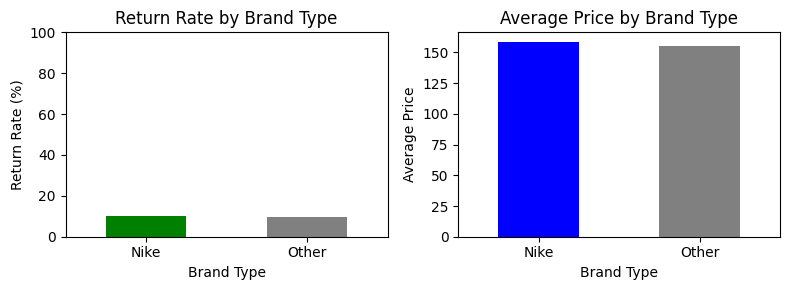

In [57]:
# HYPOTHESIS 3: Premium brands (e.g., Nike) have lower return rates despite higher prices.

df['brand_type'] = df['brand'].apply(lambda x: 'Nike' if x == 'Nike' else 'Other')

grouped = df.groupby('brand_type')

return_rate = grouped['is_returned'].mean() * 100  # percentage

avg_price = grouped['price'].mean()

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

return_rate.plot(kind='bar', ax=axes[0], color=['green', 'gray'])
axes[0].set_title('Return Rate by Brand Type')
axes[0].set_ylabel('Return Rate (%)')
axes[0].set_xlabel('Brand Type')
axes[0].set_ylim(0, 100)
axes[0].set_xticklabels(return_rate.index, rotation=0)

avg_price.plot(kind='bar', ax=axes[1], color=['blue', 'gray'])
axes[1].set_title('Average Price by Brand Type')
axes[1].set_ylabel('Average Price')
axes[1].set_xlabel('Brand Type')
axes[1].set_xticklabels(avg_price.index, rotation=0)

plt.tight_layout()
plt.show()

# Nike, has more return rate than any other brand despite having a marginally higher average price as compared to other brands

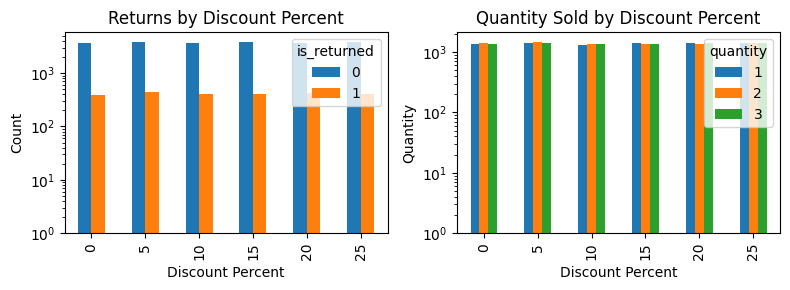

In [58]:
# HYPOTHESIS 4: Higher discounts lead to higher quantity sold but also higher return rates.

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
returns = df.groupby(['discount_percent', 'is_returned']).size().unstack()
quantity = df.groupby(['discount_percent', 'quantity']).size().unstack()

returns.plot(kind='bar', ax=axes[0], log=True)
axes[0].set_title('Returns by Discount Percent')
axes[0].set_xlabel('Discount Percent')
axes[0].set_ylabel('Count')

quantity.plot(kind='bar', ax=axes[1], log=True)
axes[1].set_title('Quantity Sold by Discount Percent')
axes[1].set_xlabel('Discount Percent')
axes[1].set_ylabel('Quantity')

plt.tight_layout()
plt.show()

# No, higher discounts does not lead to higher quantity sold but also higher return rates.
# Infact, higher discount had much lower revenue generation becuase higher discounted was only given for expensive products

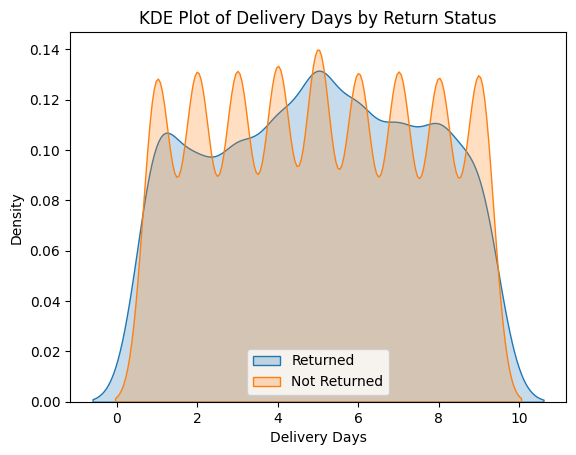

In [59]:
# HYPOTHESIS 5: Longer delivery times negatively impact increase returns.

sns.kdeplot(data=df[df['is_returned'] == 1]['delivery_days'], label='Returned', fill=True)
sns.kdeplot(data=df[df['is_returned'] == 0]['delivery_days'], label='Not Returned', fill=True)
plt.title('KDE Plot of Delivery Days by Return Status')
plt.xlabel('Delivery Days')
plt.legend()
plt.show()

# No, higher delivery days doesn't necessarily drives more return products

## E. Advanced Analyses

In [60]:
# Cohort Analysis: Group customers by their first purchase month and track retention (repeat orders) over time.

# As already noted earlier, there is no repeat customers in the dataset and hence it is impossible to  segment customers into first time and repeat purchases

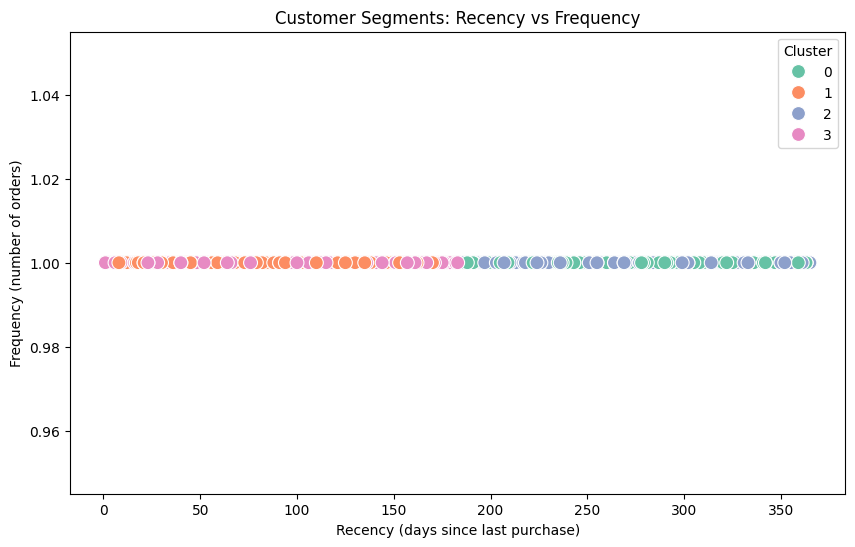

In [61]:
# Customer Segmentation: Cluster customers based on RFM (Recency, Frequency,  Monetary) and behavior (returns, rating).
# Again, its futile to segment customers but I have tried and as expected there is no pattern to be found here.

ref_date = df['order_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (ref_date - x.max()).days,
    'customer_id': 'count',
    'price': 'sum'
}).rename(columns={
    'order_date': 'Recency',
    'customer_id': 'Frequency',
    'order_amount': 'Monetary'
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of orders)')
plt.legend(title='Cluster')
plt.show()

/tmp/ipython-input-2420122744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elastic['price_bin'] = pd.cut(df_elastic['new_final_price'], bins=np.arange(0, df['price'].max()+20, 20))
/tmp/ipython-input-2420122744.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_summary = df_elastic.groupby('price_bin').agg({


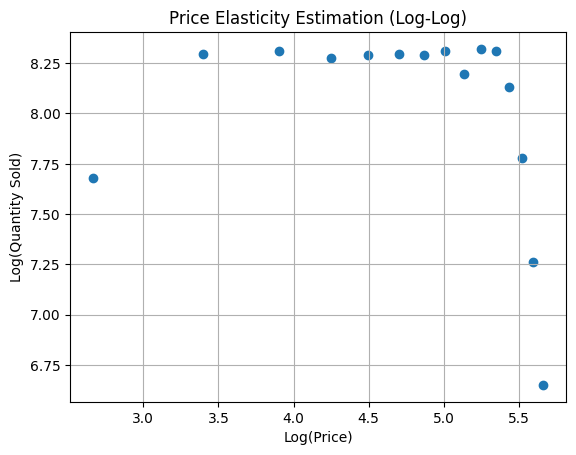

In [62]:
# Price Elasticity Estimation: Approximate sensitivity of quantity sold to price/discount changes.

df_elastic = df[['order_date','quantity','new_final_price','discount_percent']]

df_elastic['price_bin'] = pd.cut(df_elastic['new_final_price'], bins=np.arange(0, df['price'].max()+20, 20))

price_summary = df_elastic.groupby('price_bin').agg({
    'new_final_price': 'mean',
    'quantity': 'sum'
}).reset_index()

price_summary = price_summary[price_summary['quantity'] > 0]  # Remove 0 sales
price_summary['log_price'] = np.log(price_summary['new_final_price'])
price_summary['log_quantity'] = np.log(price_summary['quantity'])

plt.scatter(price_summary['log_price'], price_summary['log_quantity'])
plt.xlabel("Log(Price)")
plt.ylabel("Log(Quantity Sold)")
plt.title("Price Elasticity Estimation (Log-Log)")
plt.grid(True)
plt.show()

In [63]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    price_summary['log_price'], price_summary['log_quantity']
)

print(f"Estimated Price Elasticity: {slope:.2f}")
print(f"R-squared: {r_value**2:.2f}")


# Negative elasticity means as price increases, quantity sold decreases. However, an elasticity of -0.15 means that a 1% increase in price leads to only a 0.15% drop in quantity
# Only 7% of the variation in quantity sold is explained by price.

Estimated Price Elasticity: -0.15
R-squared: 0.07


In [64]:
# Return Prediction Feature Ideas: Build a simple logistic regression or decision tree prototype to predict whether an order will be returned (feature importance discussion suffices for EDA).

# Only 10% of the total orders were ever returned. Meanwhile, our above analysis has tried to find correlation between delivery_days, payment_method, region
# or any other cause as responsible for the return behaviour but to no avail. This leaves us with no discernible pattern

# I have no idea how would I construct a feature that could possibly tell me when an order is most likely to be returned.
# Maybe the Anamoly Detection code could be expanded to accomodate  more data points and then we could find some discernible pattern.

In [65]:
# Anomaly Detection: Identify suspicious orders (e.g., extremely high discount with high quantity + immediate return).


HIGH_DISCOUNT_THRESHOLD = 50.00
HIGH_QUANTITY_THRESHOLD = df['quantity'].quantile(0.95)


df['is_anomalous'] = (
    (df['discount_amount'] >= HIGH_DISCOUNT_THRESHOLD) &
    (df['quantity'] >= HIGH_QUANTITY_THRESHOLD) &
    (df['is_returned'] == 1)
)


suspicious_orders = df[df['is_anomalous']]


print(f"Suspicious orders detected: {len(suspicious_orders)}")
suspicious_orders[['order_date', 'quantity', 'discount_amount', 'new_final_price', 'is_returned']]


Suspicious orders detected: 49


,order_date,quantity,discount_amount,new_final_price,is_returned
311,2024-10-21,3,69.80,209.41,1
604,2025-06-02,3,52.01,208.03,1
1087,2024-10-22,3,52.10,156.32,1
1907,2024-12-20,3,53.00,159.00,1
3434,2024-10-19,3,54.05,216.22,1
3670,2024-07-25,3,56.34,225.34,1
3872,2024-07-02,3,73.58,220.76,1
4274,2024-11-05,3,58.75,234.99,1
4465,2024-10-23,3,55.57,222.30,1
4700,2024-08-21,3,67.77,203.31,1


In [66]:
# Time-to-Delivery Hotspots: Identify regions or product types with consistent delivery delays.
# Northeeast faces the most amount of delay espacially for items like Onesies and Booties
# Midwest tend to face consistent delivery days across the board

df.groupby(['region', 'sub_category'])['delivery_days'].median().sort_values(ascending=False).head(15)

region     sub_category
Northeast  Onesies         6.0
           Booties         6.0
West       Watches         5.5
Midwest    Blankets        5.0
           Handbags        5.0
           Booties         5.0
           Caps            5.0
           Dresses         5.0
           Jewelry         5.0
           Onesies         5.0
           Rompers         5.0
           Sandals         5.0
           Shirts          5.0
           Hats            5.0
           Jackets         5.0
Name: delivery_days, dtype: float64

# **THE END**